# __Mathematical Model__

<br>

<div align="justify">
    The mathematical model approach requires an analysis process of the variables to know which one has a bigger influence. We start by importing the experimental data of the problem to solve, then we make an statistical study through a normal distribution graph and a Pareto chart. Finally, we evaluate different mathematical models and choose the one that adapts best.
</div>

In [ ]:
%store -r Datos
%store -r current_dir
%store -r language
import sys
sys.path.insert(0, current_dir)

## Stability

<br>

<div align="justify">
    First, it is important to define the stability of the experiment.
</div>

In [ ]:
from App.Pretratamiento.Estabilidad import Est
Estabilidad = Est(Datos)

Estab = Estabilidad(language)
%store Estab
Estab

The experimental cube (for 2 and 3 variables only) can be seen by executing the next block of code.

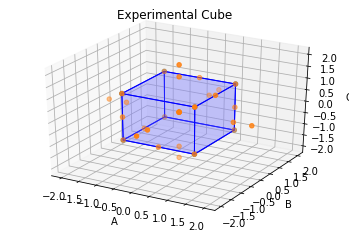

In [3]:
%matplotlib inline
from App.Pretratamiento.Cube import *
ExpCube(Datos, language)

<div align = "justify">
    It is important to make a discretization between the data used for the <i>model generation</i> and the remainig for the <i>model validation</i>.
</div>

<br>

<div align = "justify">
    The data used in the model generation are those seen in the experimental cube surface, while the model validation requires data from both inside and outside the experimental cube. In summary:
</div>

$$
\begin{equation}
  Generation=\left\{
    \begin{array}{@{} l c @{}}
      1 & \text{Upper level} \\
      0 & \text{Cube's center}\\
      -1 & \text{Lower level}
    \end{array}\right.
\end{equation}
$$

In [ ]:
Data_Plant = Estabilidad.Plant
Data_Val = Estabilidad.Val

%store Data_Plant
%store Data_Val

Data_Plant = Datos

## Análisis de la varianza

<br>

<div align="justify">
    A continuación, se puede apreciar la variación entre los datos experimentales a partir de una gráfica de distribución normal y un diagrama de pareto.
</div>

In [ ]:
#Para jupyter notebook -> %matplotlib notebook
#Para jupyter lab -> %matplotlib inline
%matplotlib inline
from App.Pretratamiento.ANOVA import NormalGraph, Pareto
NormDist = NormalGraph(Data_Plant)()
%store NormDist

In [ ]:
%matplotlib inline
#Verdadero = True    Falso = False
P = Pareto(Data_Plant, porcentaje = 95, grid=True)
Efecto = P.ef
print('Variables de mayor efecto:', Efecto)

## __Modelos Matemáticos__

<br>

<div align="justify">
    El análisis de la varianza nos ayuda a entender cuáles son las variables con mayor efecto dentro del fenómeno experimental estudiado. En pocas palabras, permite identificar un punto de partida para el inicio del proceso iterativo. Gracias a la tecnología, es posible evaluar cientos (y puede que miles) de modelos matemáticos en cuestión de segundos!
</div>

<br>

<div align="justify">
    Pero antes de pensar en plantear múltiples modelos de manera simultánea, concentrémonos en plantear el primero. 
</div>

### Planteamiento

<br> 

<div align="justify">
    El modelo matemático general planteado es del orden:
</div>

$$
\begin{equation}
    Y = b X
    \label{General}
    \tag{1}
\end{equation}
$$

Donde $Y$ corresponde a la respuesta, $b$ a las constantes y $X$ a las variables.

Durante la práctica experimental, obtuvimos diversas variables de respuesta $\left( Y_{exp} \right)$, conocemos cuáles son las variables $X$, pero desconocemos el valor de las constantes, además del comportamiento propio del modelo que permite apreciar la solución "exacta" (experimental). Para calcular este valor, se desarrolla un modelo matemático que puede ser del tipo mostrado en la Ecuación \ref{Desglosada}.

$$
\begin{equation}
    Y_{cal} = B_0 + B_1 X_1 + B_2 X_1 X_2 + B_3 X_3 ^2 + \dots
    \label{Desglosada}
    \tag{2}
\end{equation}
$$


En términos matriciales, la Ecuación \ref{Desglosada} es:

$$
\begin{equation}
    b = \left( X^T X \right) ^{-1} Y_{exp}
    \label{Const}
    \tag{3}
\end{equation}
$$

### Error inherente

El modelo planteado acarrea un error inherente, el cual es estimado a partir del cálculo de los coeficientes de determinación $\left( R^2 \, y \, R^2 _{ajus} \right)$. Estos coeficientes se calculan a partir de las Ecuaciones \ref{R2} y \ref{R2aju}.

$$
\begin{equation}
    R^2 = \frac{\sum _{i=1} ^n \left(Y_i - \bar{Y}_{exp} \right)^2 - \sum _{i=1} ^n \left(Y_i - Y_{cal _i} \right)^2}{\sum _{i=1} ^n \left(Y_i - \bar{Y}_{exp} \right)^2 }
    \label{R2}
    \tag{4}
\end{equation}
$$

$$
\begin{equation}
    R^2 _{ajus} = \frac{\sum _{i=1} ^n \left(Y_i - \bar{Y}_{exp} \right)^2/GL_{exp} - \sum _{i=1} ^n \left(Y_i - Y_{cal _i} \right)^2 /GL_{cal}}{\sum _{i=1} ^n \left(Y_i - \bar{Y}_{exp} \right)^2 /GL_{exp}}
    \label{R2aju}
    \tag{5}
\end{equation}
$$

Dónde: $Y_i$ corresponde a la respuesta experimental de la línea $i$ del total del número de experimentos $n$, $\bar{Y}_{exp}$ corresponde a la media de las respuestas experimentales, $Y_{cal_i}$ es la respuesta calculada por el modelo propuesto para la línea $i$, $GL_{exp}$ corresponde a los grados de libertad experimentales y $GL_{cal}$ a los grados de libertad del modelo.

Los grados de libertad se calculan a partir del número de datos $n$ junto con el número de variables $m$, como se muestra a continuación:

$$
\begin{equation}
    GL_{exp} = n-1
    \label{GLexp}
    \tag{6}
\end{equation}
$$

$$
\begin{equation}
    GL_{cal} = n-m-1
    \label{GLcal}
    \tag{7}
\end{equation}
$$


### Modelos Iniciales

<br>

<div align="justify">
    Los modelos iniciales evaluados corresponden a las combinaciones posibles de las variables seleccionadas en la sección <i>"Análisis de la varianza"</i>.
</div>

In [ ]:
from App.Modelos.Planteamiento import ModelosIniciales, ModeloFinal
from App.Modelos.Respuesta import *
nombre_bd = 'base'
P = ModelosIniciales(Data_Plant, NormDist, Efecto, nombre_bd)
Iniciales = P.Mejores
Mejor = P.Mejor
%store nombre_bd

In [ ]:
for key in Iniciales:
    print('Modelo ' + str(key) + ':')
    Models(Iniciales[key])

#### Mejor modelo Inicial

El modelo base seleccionado es:

In [ ]:
Models(Mejor)

## __Modelo Final__

<br>


El modelo base corresponde al mejor modelo seleccionado con exponente a la 1. Ahora, se evaluará la misma combinación con diferentes exponentes. El criterio de selección es el mayor $R ^2 _{ajus}$ posible. Se trata de un proceso iterativo en el que se evalúa la tendencia del criterio, para prever la mejor combinación de exponentes que permita seleccionar el modelo matemático final.

In [ ]:
#Ecuación a evaluar
Porcentaje = 1.1       #Recomendable: 0.85 - Visualizar < 1.0
Eq = Mejor['Ecuación']
Eq = ('C', 'A', 'AB', 'ABC')
Final = ModeloFinal(Eq, NormDist, ref = 0.95, Y = Data_Plant['Y'],\
                    maximo=2, db='db', Porcentaje=Porcentaje)

In [ ]:
#¿Quieres seleccionar el mejor modelo inicial?
Modelo = Mejor
%store Modelo

In [ ]:
Modelo = Final.Ans
Models(Modelo)
%store Modelo

### Resultados Gráficos

<br>

<div align = "justify">
    Los resultados gráficos (Y vs Ycal y Residuo) se pueden apreciar a continuación.
</div>

In [ ]:
from App.Modelos.Resultados import *
Ys(Modelo, Data_Plant['Y'])

In [ ]:
Residuo(Modelo, Data_Plant['Y'])

In [ ]:
#Para ejemplo 1
limits = {
    'A':{
        '-1':-1,
        '1':1
    },
    'B':{
        '-1':1,
        '1':-1
    },
    'C':{
        '-1':-1,
        '1':1
    }
}

SuperficieRespuesta(Modelo, limits)

In [ ]:
import ipywidgets as widgets
import subprocess
button = widgets.Button(description='Validación')
out = widgets.Output()
def on_button_clicked(b):
    with out:
        subprocess.run("jupyter lab validation.ipynb")

button.on_click(on_button_clicked)
widgets.VBox([button, out])